First few rows of the dataset:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A 

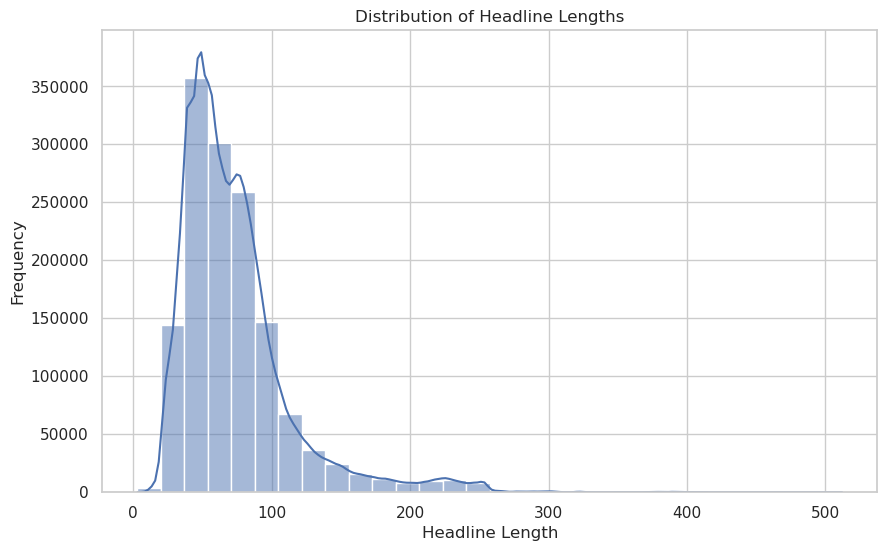

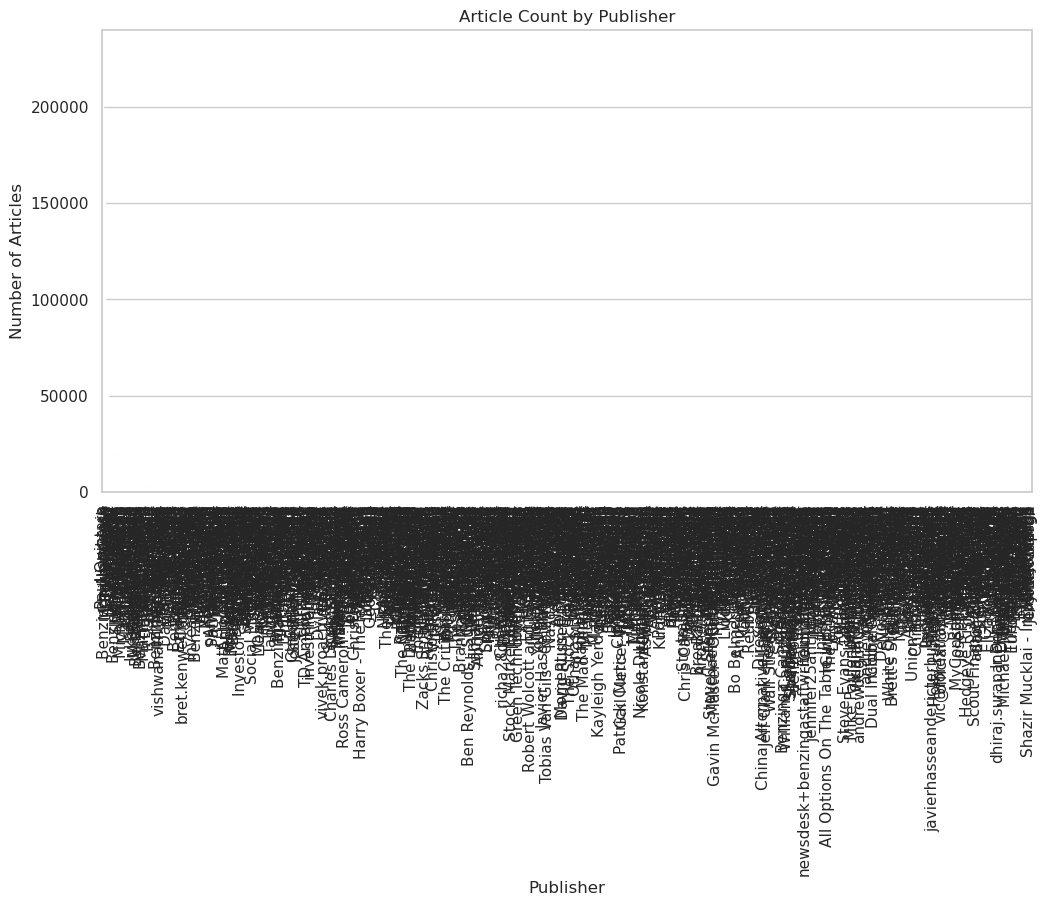

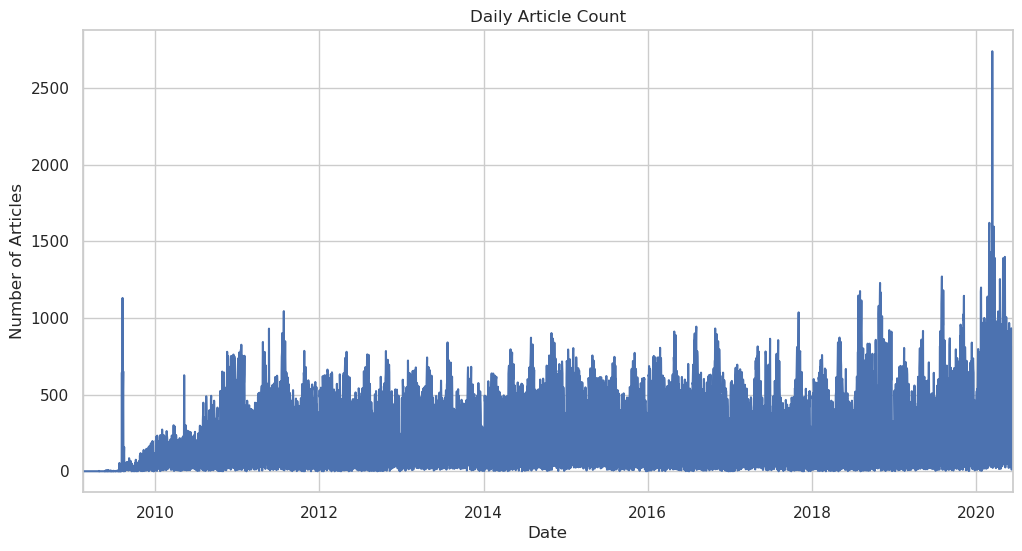

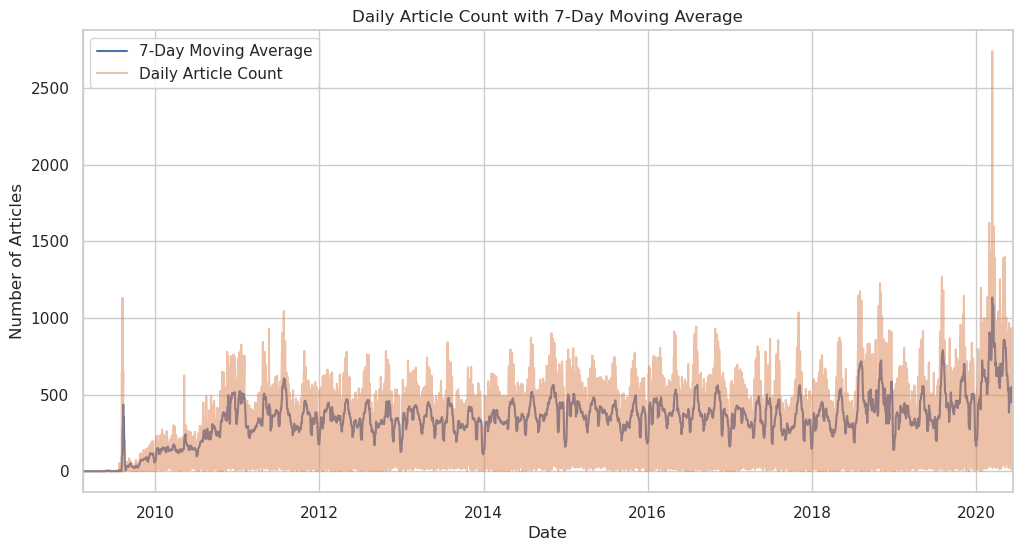

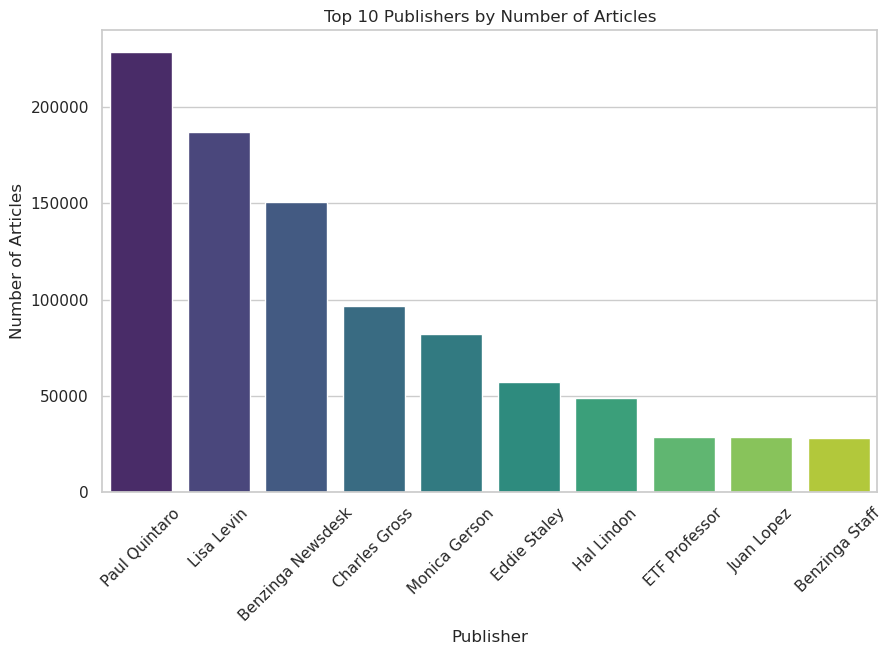

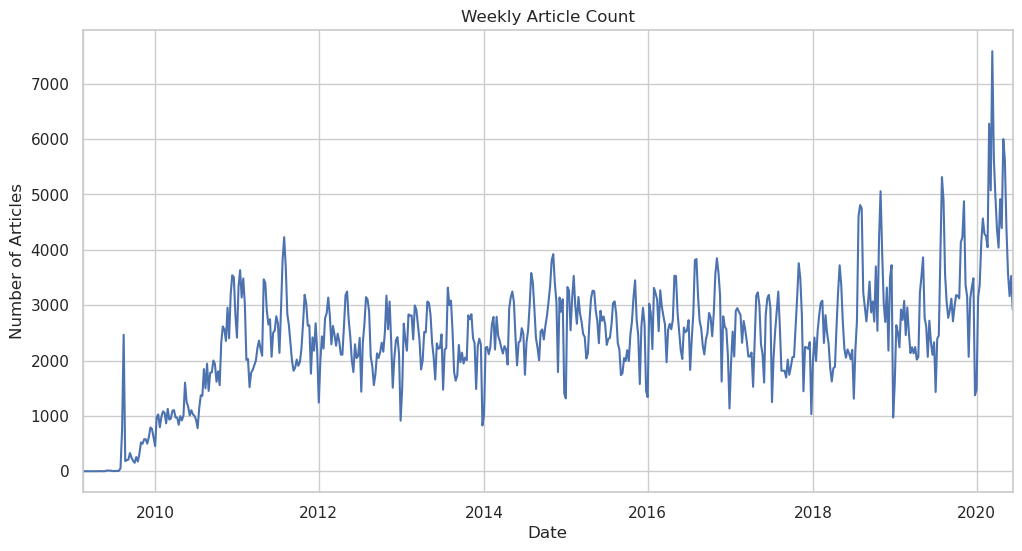

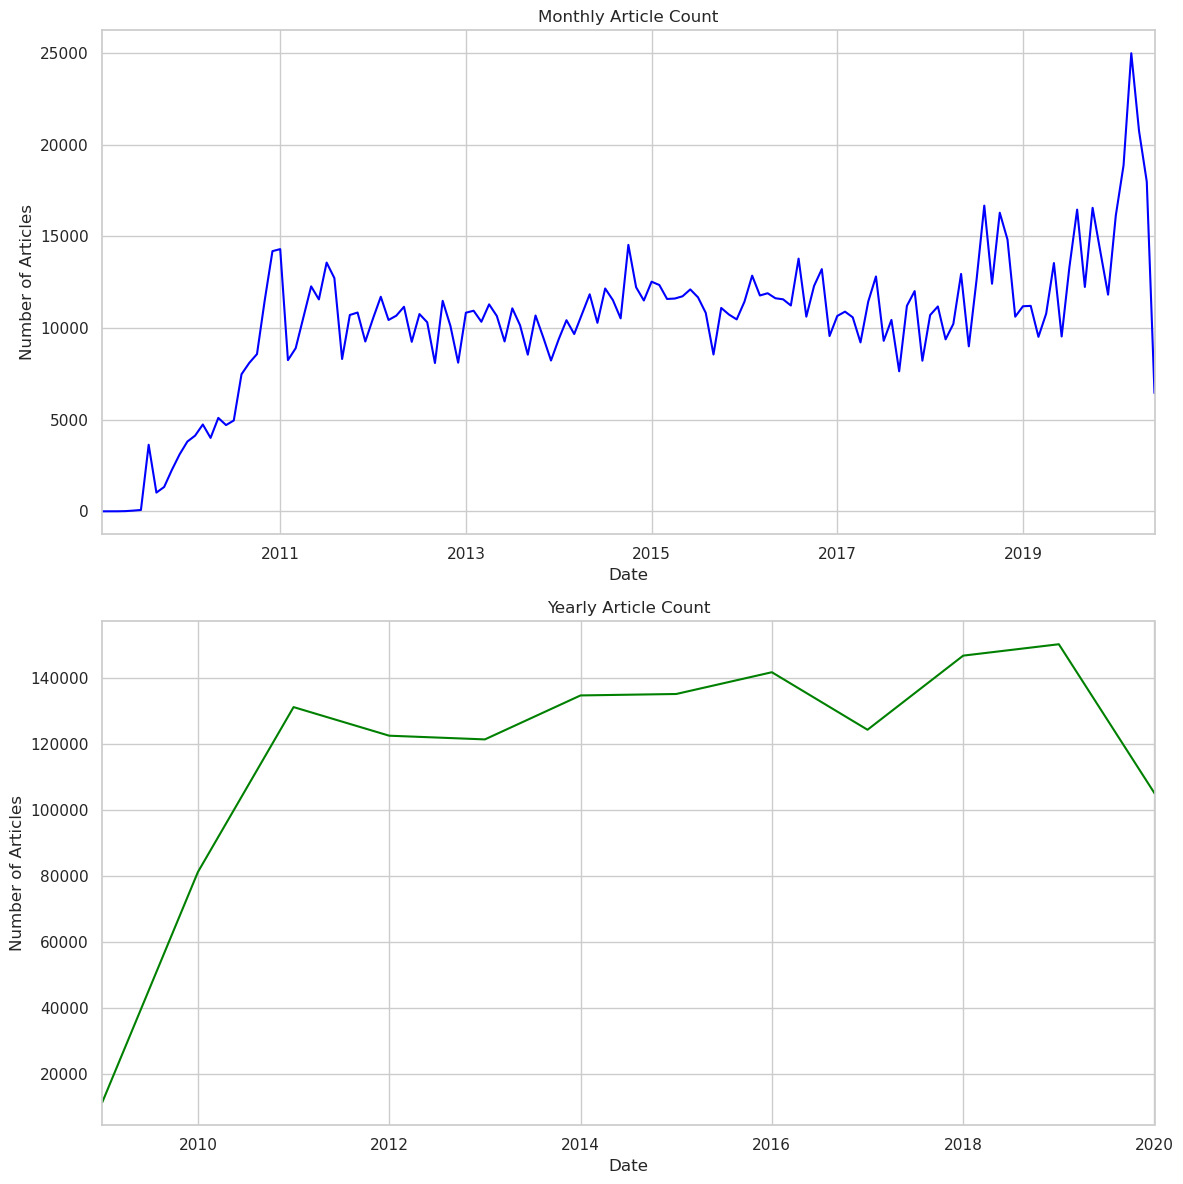

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('/home/ayalk94/Desktop/Education/ML tutorial/week1 files/week_1_challenge/news-analysis/data/raw_analyst_ratings.csv')

# Display the first few rows of the dataset for a quick overview
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing data (Example: Drop rows with missing headlines or dates)
df.dropna(subset=['headline', 'date'], inplace=True)

# Convert 'date' column to datetime and make timezone-naive
df['date'] = pd.to_datetime(df['date'], utc=True).dt.tz_convert(None)

# Basic descriptive statistics of the dataset
print("\nDescriptive statistics of numeric columns:")
print(df.describe())

# Descriptive statistics of the 'headline_length'
df['headline_length'] = df['headline'].apply(len)
print("\nDescriptive statistics for headline length:")
print(df['headline_length'].describe())

# Plot the distribution of headline lengths
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

# Article count per publisher
publisher_counts = df['publisher'].value_counts()

# Plot article count per publisher
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title("Article Count by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)
plt.show()

# Time series analysis: Count articles published per day
df.set_index('date', inplace=True)
daily_article_count = df['headline'].resample('D').count()

# Plot daily article count
plt.figure(figsize=(12, 6))
daily_article_count.plot()
plt.title("Daily Article Count")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

# Additional: Plot article counts over time with rolling average
plt.figure(figsize=(12, 6))
daily_article_count.rolling(window=7).mean().plot(label='7-Day Moving Average')
daily_article_count.plot(alpha=0.5, label='Daily Article Count')
plt.title("Daily Article Count with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.show()

# Publisher Analysis: Top 10 publishers by article count
top_10_publishers = publisher_counts.head(10)

# Plot top 10 publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values, palette="viridis")
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

# Time Series Analysis: Articles published per week
weekly_article_count = df['headline'].resample('W').count()

# Plot weekly article count
plt.figure(figsize=(12, 6))
weekly_article_count.plot()
plt.title("Weekly Article Count")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

# Additional: Check publication trends by month and year
monthly_article_count = df['headline'].resample('M').count()
yearly_article_count = df['headline'].resample('Y').count()

# Plot monthly and yearly article counts
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

monthly_article_count.plot(ax=ax[0], color='blue')
ax[0].set_title("Monthly Article Count")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of Articles")

yearly_article_count.plot(ax=ax[1], color='green')
ax[1].set_title("Yearly Article Count")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of Articles")

plt.tight_layout()
plt.show()
